In [28]:
#Import of function to calculate comoving distances 
import sys 
sys.path.append("../")
from pyACC.Cosmology import Integrand_comoving_distance
from pyACC.Cosmology import comoving_distance

import numpy as np
import math 
import matplotlib.pyplot as plt
plt.rcParams.update({
    "text.usetex": False,
    "font.family": "serif",})

#Import from scipy to interpolate
from scipy import interpolate

# Import pyACC logger
from pyACC.helpers import Logger

# Set the logger
print = Logger("pyACC.CosmologicalDistances")#Import of function to calculate comoving distances 
import sys 
sys.path.append("../")
from pyACC.Cosmology import Integrand_comoving_distance
from pyACC.Cosmology import comoving_distance

import numpy as np
import math 
import matplotlib.pyplot as plt
plt.rcParams.update({
    "text.usetex": False,
    "font.family": "serif",})

# Import pyACC logger
from pyACC.helpers import Logger

# Set the logger
print = Logger("pyACC.CosmologicalDistances")

In [29]:
#Definition of parameters and Cosmologiacal Model 
z_min     = 0 
z_max     = 2
delta_z   = 0.1
Omega_mat = 0.319 
H_0       = 67

def Hubble_function_L_CDM(z, Omega_mat, H_0):
    return H_0*(Omega_mat*(1+z)**3+1-Omega_mat)**0.5

In [30]:
#Set of redshifts
z_list = np.arange(z_min, z_max, delta_z)

#Computing comoving distances
d_list = []

for i in range(len(z_list)):
    comoving_distances_L_CDM = comoving_distance(z_list[i], Hubble_function_L_CDM, Omega_mat, H_0)
    d_list.append(comoving_distances_L_CDM)

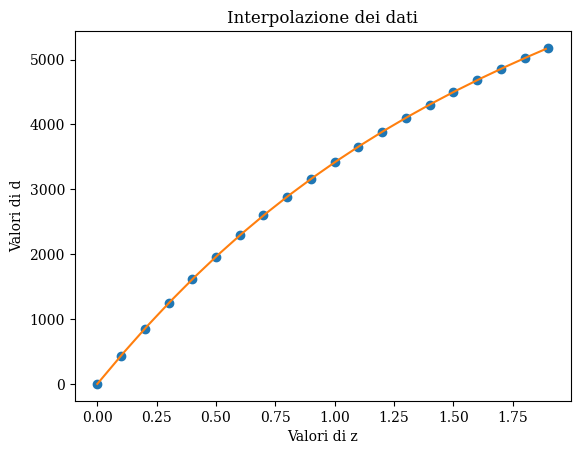

2024-03-12 21:06:39.744252 :: pyACC.CosmologicalDistances  :: 190
2024-03-12 21:06:39.744384 :: pyACC.CosmologicalDistances  :: 20


In [31]:
#Function resulting from interpolate
f = interpolate.interp1d(z_list, d_list, kind='linear',bounds_error='false', fill_value=np.nan) 
#interp1d takes x and y, interpoles with kind; fill_value allows you to define value out of range: in this case, nan

#Wanting to have access to all points f has calculated
delta_z_new = 0.01

z_list_new = np.arange(z_min, z_max-0.1, delta_z_new)

d_list_new = f(z_list_new)   # use interpolation function returned by `interp1d`

plt.plot(z_list, d_list, 'o', z_list_new, d_list_new, '-')
plt.xlabel('Valori di z')
plt.ylabel('Valori di d')
plt.title('Interpolazione dei dati')
plt.show()

print(len(z_list_new))
print(len(z_list))

2024-03-12 21:06:39.894081 :: pyACC.CosmologicalDistances  :: 190
2024-03-12 21:06:39.894334 :: pyACC.CosmologicalDistances  :: 190
2024-03-12 21:06:39.894703 :: pyACC.CosmologicalDistances  :: 190
2024-03-12 21:06:39.894803 :: pyACC.CosmologicalDistances  :: [-0.0, 0.981291406885326, 1.7471592865653918, 2.2964960038222273, 2.628261430860732, 3.178383009225371, 2.6352529583380715, 2.741227046953327, 1.7611459892711991, 0.9917838231029918, -0.0, 1.0101107710947872, 1.7966972822722482, 2.359301100980815, 2.697524492863181, 2.811029457690779, 2.6995367264729566, 2.362824722827895, 1.8007284916642448, 1.0131385981645735, -0.0, 1.0125252413220096, 1.7995502429085946, 2.361176148005029, 2.697553769662477, 2.8088823705325012, 2.6954084318931564, 2.3574244142680527, 1.7952675119147443, 1.0093184033496527, 2.2737367544323206e-13, 0.9935513329330661, 1.7647008896726675, 2.3139907826409853, 2.6420003711702975, 2.749345028547623, 2.6366749176215762, 2.3046737763720557, 1.7540577147651675, 0.985574

Text(0.5, 1.0, 'Redshift vs Errore')

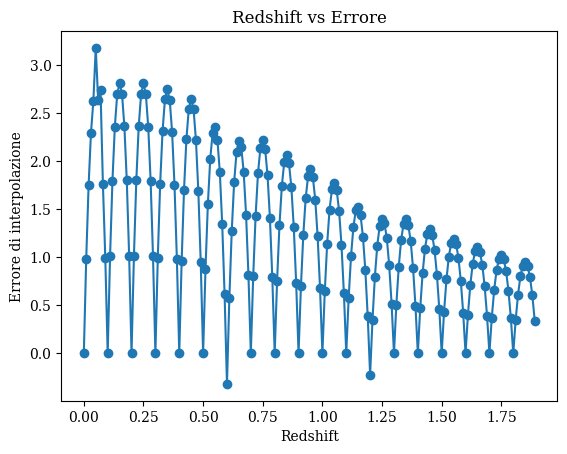

In [32]:
#Computing error between theory and computation

#Theory
d_theory = []

for i in range(len(z_list_new)):
    comoving_distances_L_CDM_2 = comoving_distance(z_list_new[i], Hubble_function_L_CDM, Omega_mat, H_0)
    d_theory.append(comoving_distances_L_CDM_2)

print(len(d_theory))
print(len(d_list_new))

Delta = []

for i in range(len(z_list_new)):
    delta = d_list_new[i] - d_theory[i]
    Delta.append(-delta)

print(len(Delta))
print(Delta)


plt.plot(z_list_new, Delta, marker='o', linestyle='-')  # marker='o' indica che vogliamo visualizzare i punti e linestyle='-' indica che vogliamo una linea continua
plt.xlabel('Redshift')
plt.ylabel('Errore di interpolazione')
plt.title('Redshift vs Errore')